In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
from paprika.analysis import get_block_sem, get_nearest_max
from paprika.io import json_numpy_obj_hook

In [2]:
def block_sem(data):
    avgs = np.mean(data)
    totn = data.size
    blkn = get_nearest_max(totn)
    sems = get_block_sem(data[:blkn])

    return [avgs, sems]

## Load Results

In [3]:
with open("potential-a000.json", "r") as f:
    bound_raw = json.load(f, object_hook=json_numpy_obj_hook)

In [4]:
with open("potential-r014.json", "r") as f:
    unbound_raw = json.load(f, object_hook=json_numpy_obj_hook)

## Estimate Enthalpy

In [5]:
# Get SEM from block-data analysis
bound = block_sem(bound_raw["potential"])
unbound = block_sem(unbound_raw["potential"])

In [7]:
enthalpy = bound[0] - unbound[0]
sem = (bound[1] ** 2 + unbound[1] ** 2) ** 0.5

In [8]:
print(f"Bound Potential  : {bound[0]:.2f} +- {bound[1]:.2f} kcal/mol")
print(f"Unbound Potential: {unbound[0]:.2f} +- {unbound[1]:.2f} kcal/mol")
print(f"Binding Enthalpy : {enthalpy:.2f} +- {sem:.2f} kcal/mol")

Bound Potential  : -21865.44 +- 0.17 kcal/mol
Unbound Potential: -21839.56 +- 0.22 kcal/mol
Binding Enthalpy : -25.87 +- 0.27 kcal/mol


## Cummulative Average Over Time

In [19]:
fraction = [0.01, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
N_data = len(bound_raw["potential"])

enthalpy_cummulative = []

for i in fraction:
    n_i = int(i * N_data)
    enthalpy_cummulative.append(
        np.mean(bound_raw["potential"][:n_i]) - np.mean(unbound_raw["potential"][:n_i])
    )

Text(0, 0.5, '$\\Delta H_{calc}$')

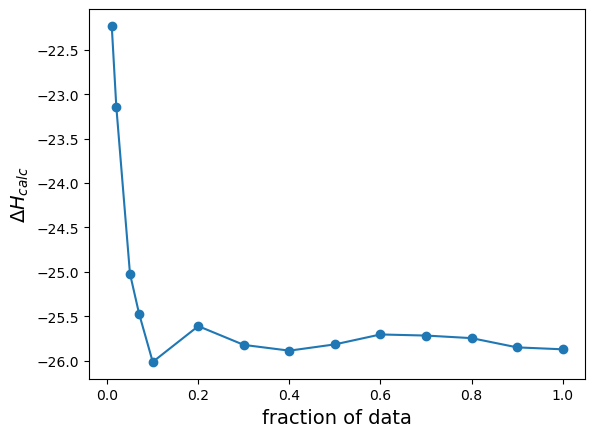

In [24]:
plt.plot(fraction, enthalpy_cummulative, "-o")
plt.xlabel("fraction of data", fontsize=14)
plt.ylabel(r"$\Delta H_{calc}$", fontsize=14)